# Plot effective kernel of our filters

In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

In [2]:
import gcm_filters # use branch https://github.com/gustavo-marques/gcm-filters/tree/anisotropic_kappas

In [3]:
list(gcm_filters.GridType)

[<GridType.CARTESIAN: 1>,
 <GridType.CARTESIAN_WITH_LAND: 2>,
 <GridType.IRREGULAR_CARTESIAN_WITH_LAND: 3>]

In [4]:
gcm_filters.required_grid_vars(gcm_filters.GridType.IRREGULAR_CARTESIAN_WITH_LAND)

['wet_mask', 'dxw', 'dyw', 'dxs', 'dys', 'area', 'kappa_w', 'kappa_s']

## Open POP 0.1 degree data

In [5]:
ds = xr.open_dataset('/glade/work/igrooms/current_data', decode_times=False)

### Make ocean ("wet") mask

In [6]:
wet_mask = xr.where(ds['KMT']>0,1,0)

Text(0.5, 1.0, 'wet_mask')

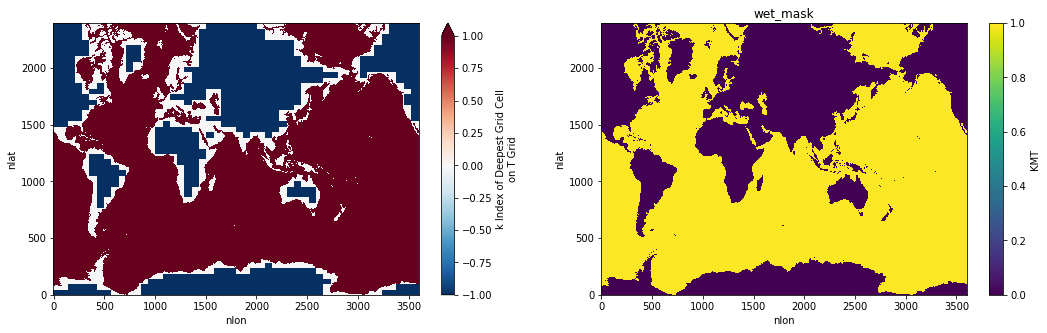

In [7]:
fig,axs = plt.subplots(1,2,figsize=(18,5))
ds.KMT.plot(ax=axs[0],vmin=ds.KMT.min())
wet_mask.plot(ax=axs[1])
axs[1].set_title('wet_mask')

### Create remaining grid info required by `IRREGULAR_CARTESIAN_WITH_LAND` Laplacian 

In [8]:
# grid spacings in m
HUS = ds.HUS.where(wet_mask)/100 
HTE = ds.HTE.where(wet_mask)/100 
HTN = ds.HTN.where(wet_mask)/100 
HUW = ds.HUW.where(wet_mask)/100 
TAREA = ds.TAREA.where(wet_mask)/10000

dxw = HUS.roll(nlon=-1, roll_coords=False)  # x-spacing centered at western T-cell edge
dyw = HTE.roll(nlon=-1, roll_coords=False)  # y-spacing centered at western T-cell edge
dxs = HTN.roll(nlat=-1, roll_coords=False)  # x-spacing centered at southern T-cell edge
dys = HUW.roll(nlat=-1, roll_coords=False)  # y-spacing centered at southern T-cell edge in m
tarea = TAREA  # cell area

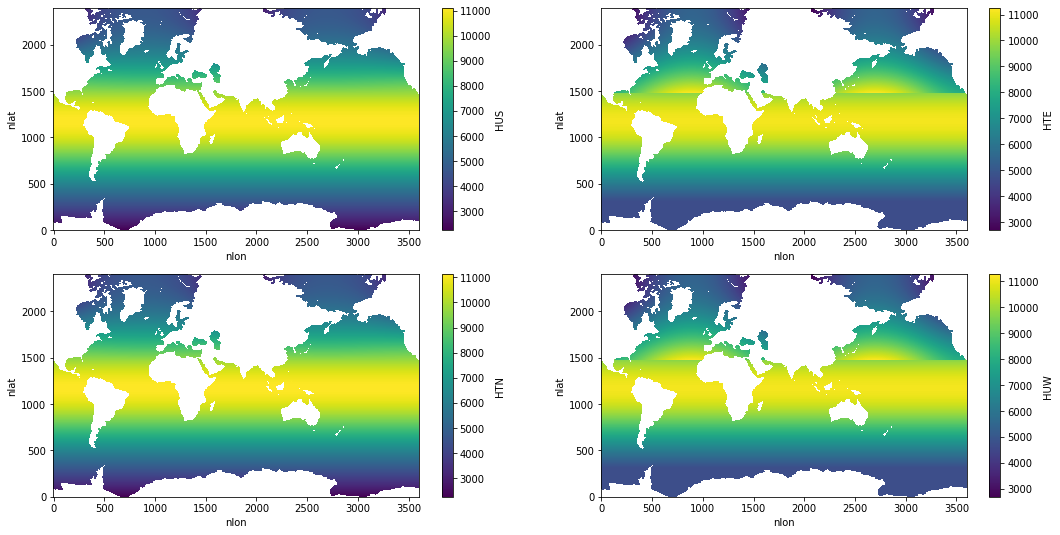

In [9]:
fig,axs = plt.subplots(2,2,figsize=(18,9))
dxw.plot(ax=axs[0,0])
dyw.plot(ax=axs[0,1])
dxs.plot(ax=axs[1,0])
dys.plot(ax=axs[1,1])

In [10]:
dx_min = min(dxw.min(),dyw.min(),dxs.min(),dys.min())
dx_min = dx_min.values
dx_min

array(2245.78304344)

# Define spatial filters, `n_steps=50`

In [11]:
filter_scale = 111700 

We will test 
* two different filter shapes: Gaussian and Taper
* two sets of kappa: one set defining isotropic filtering, one set defining anisotropic filtering

### Gaussian

In [28]:
filter_Gaussian_isotropic = gcm_filters.Filter(
    filter_scale=filter_scale,
    dx_min=dx_min,
    filter_shape=gcm_filters.FilterShape.GAUSSIAN,
    n_steps=50, 
    grid_type=gcm_filters.GridType.IRREGULAR_CARTESIAN_WITH_LAND,
    grid_vars={'wet_mask': wet_mask, 'dxw': dxw, 'dyw': dyw, 'dxs': dxs, 'dys': dys, 'area': tarea, 'kappa_w': xr.ones_like(wet_mask), 'kappa_s': xr.ones_like(wet_mask)}
)
filter_Gaussian_isotropic

n_steps = 50


Filter(filter_scale=111700, dx_min=array(2245.78304344), filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=50, grid_type=<GridType.IRREGULAR_CARTESIAN_WITH_LAND: 3>)

In [29]:
filter_Gaussian_anisotropic = gcm_filters.Filter(
    filter_scale=filter_scale,
    dx_min=dx_min,
    filter_shape=gcm_filters.FilterShape.GAUSSIAN,
    n_steps=50,  
    grid_type=gcm_filters.GridType.IRREGULAR_CARTESIAN_WITH_LAND,
    grid_vars={'wet_mask': wet_mask, 'dxw': dxw, 'dyw': dyw, 'dxs': dxs, 'dys': dys, 'area': tarea, 'kappa_w': xr.ones_like(wet_mask), 'kappa_s': 0.1*xr.ones_like(wet_mask)}
)
filter_Gaussian_anisotropic

n_steps = 50


Filter(filter_scale=111700, dx_min=array(2245.78304344), filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=50, grid_type=<GridType.IRREGULAR_CARTESIAN_WITH_LAND: 3>)

### Taper

In [30]:
filter_Taper_isotropic = gcm_filters.Filter(
    filter_scale=filter_scale,
    dx_min=dx_min,
    filter_shape=gcm_filters.FilterShape.TAPER,
    n_steps=50,  
    grid_type=gcm_filters.GridType.IRREGULAR_CARTESIAN_WITH_LAND,
    grid_vars={'wet_mask': wet_mask, 'dxw': dxw, 'dyw': dyw, 'dxs': dxs, 'dys': dys, 'area': tarea, 'kappa_w': xr.ones_like(wet_mask), 'kappa_s': xr.ones_like(wet_mask)}
)
filter_Taper_isotropic

n_steps = 50


Filter(filter_scale=111700, dx_min=array(2245.78304344), filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=50, grid_type=<GridType.IRREGULAR_CARTESIAN_WITH_LAND: 3>)

In [31]:
filter_Taper_anisotropic = gcm_filters.Filter(
    filter_scale=filter_scale,
    dx_min=dx_min,
    filter_shape=gcm_filters.FilterShape.TAPER,
    n_steps=50,  
    grid_type=gcm_filters.GridType.IRREGULAR_CARTESIAN_WITH_LAND,
    grid_vars={'wet_mask': wet_mask, 'dxw': dxw, 'dyw': dyw, 'dxs': dxs, 'dys': dys, 'area': tarea, 'kappa_w': xr.ones_like(wet_mask), 'kappa_s': 0.1*xr.ones_like(wet_mask)}
)
filter_Taper_anisotropic

n_steps = 50


Filter(filter_scale=111700, dx_min=array(2245.78304344), filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=50, grid_type=<GridType.IRREGULAR_CARTESIAN_WITH_LAND: 3>)

## Fixed factor

Also test fixed factor.

In [32]:
filter_fixed_factor_Gaussian = gcm_filters.Filter(
    filter_scale=10,
    dx_min=1,
    filter_shape=gcm_filters.FilterShape.GAUSSIAN,
    n_steps=50, 
    grid_type=gcm_filters.GridType.CARTESIAN_WITH_LAND,
    grid_vars={'wet_mask': wet_mask}
)
filter_fixed_factor_Gaussian

n_steps = 50


Filter(filter_scale=10, dx_min=1, filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=50, grid_type=<GridType.CARTESIAN_WITH_LAND: 2>)

In [33]:
filter_fixed_factor_Taper = gcm_filters.Filter(
    filter_scale=10,
    dx_min=1,
    filter_shape=gcm_filters.FilterShape.TAPER,
    n_steps=50,  
    grid_type=gcm_filters.GridType.CARTESIAN_WITH_LAND,
    grid_vars={'wet_mask': wet_mask}
)
filter_fixed_factor_Taper

n_steps = 50


Filter(filter_scale=10, dx_min=1, filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=50, grid_type=<GridType.CARTESIAN_WITH_LAND: 2>)

### Filter delta functions in Gulf Stream region

In [34]:
delta1 = 0 * xr.ones_like(ds.nlat*ds.nlon) 
delta1[1643,398] = 1
delta1 = delta1.where(wet_mask)

delta2 = 0 * xr.ones_like(ds.nlat*ds.nlon) 
delta2[1635,440] = 1
delta2 = delta2.where(wet_mask)

delta3 = 0 * xr.ones_like(ds.nlat*ds.nlon) 
delta3[1620,363] = 1
delta3 = delta3.where(wet_mask)

In [35]:
delta1_filtered_Gaussian_isotropic = filter_Gaussian_isotropic.apply(delta1, dims=['nlat', 'nlon'])
delta2_filtered_Gaussian_isotropic = filter_Gaussian_isotropic.apply(delta2, dims=['nlat', 'nlon'])
delta3_filtered_Gaussian_isotropic = filter_Gaussian_isotropic.apply(delta3, dims=['nlat', 'nlon'])

delta1_filtered_Gaussian_anisotropic = filter_Gaussian_anisotropic.apply(delta1, dims=['nlat', 'nlon'])
delta2_filtered_Gaussian_anisotropic = filter_Gaussian_anisotropic.apply(delta2, dims=['nlat', 'nlon'])
delta3_filtered_Gaussian_anisotropic = filter_Gaussian_anisotropic.apply(delta3, dims=['nlat', 'nlon'])

delta1_filtered_Taper_isotropic = filter_Taper_isotropic.apply(delta1, dims=['nlat', 'nlon'])
delta2_filtered_Taper_isotropic = filter_Taper_isotropic.apply(delta2, dims=['nlat', 'nlon'])
delta3_filtered_Taper_isotropic = filter_Taper_isotropic.apply(delta3, dims=['nlat', 'nlon'])

delta1_filtered_Taper_anisotropic = filter_Taper_anisotropic.apply(delta1, dims=['nlat', 'nlon'])
delta2_filtered_Taper_anisotropic = filter_Taper_anisotropic.apply(delta2, dims=['nlat', 'nlon'])
delta3_filtered_Taper_anisotropic = filter_Taper_anisotropic.apply(delta3, dims=['nlat', 'nlon'])

delta1_filtered_fixed_factor_Gaussian = filter_fixed_factor_Gaussian.apply(delta1*tarea, dims=['nlat', 'nlon'])
delta1_filtered_fixed_factor_Gaussian = delta1_filtered_fixed_factor_Gaussian/tarea
delta2_filtered_fixed_factor_Gaussian = filter_fixed_factor_Gaussian.apply(delta2*tarea, dims=['nlat', 'nlon'])
delta2_filtered_fixed_factor_Gaussian = delta2_filtered_fixed_factor_Gaussian/tarea
delta3_filtered_fixed_factor_Gaussian = filter_fixed_factor_Gaussian.apply(delta3*tarea, dims=['nlat', 'nlon'])
delta3_filtered_fixed_factor_Gaussian = delta3_filtered_fixed_factor_Gaussian/tarea

delta1_filtered_fixed_factor_Taper = filter_fixed_factor_Taper.apply(delta1*tarea, dims=['nlat', 'nlon'])
delta1_filtered_fixed_factor_Taper = delta1_filtered_fixed_factor_Taper/tarea
delta2_filtered_fixed_factor_Taper = filter_fixed_factor_Taper.apply(delta2*tarea, dims=['nlat', 'nlon'])
delta2_filtered_fixed_factor_Taper = delta2_filtered_fixed_factor_Taper/tarea
delta3_filtered_fixed_factor_Taper = filter_fixed_factor_Taper.apply(delta3*tarea, dims=['nlat', 'nlon'])
delta3_filtered_fixed_factor_Taper = delta3_filtered_fixed_factor_Taper/tarea

### Plot effective filter kernels with cartopy

/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:305: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:341: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


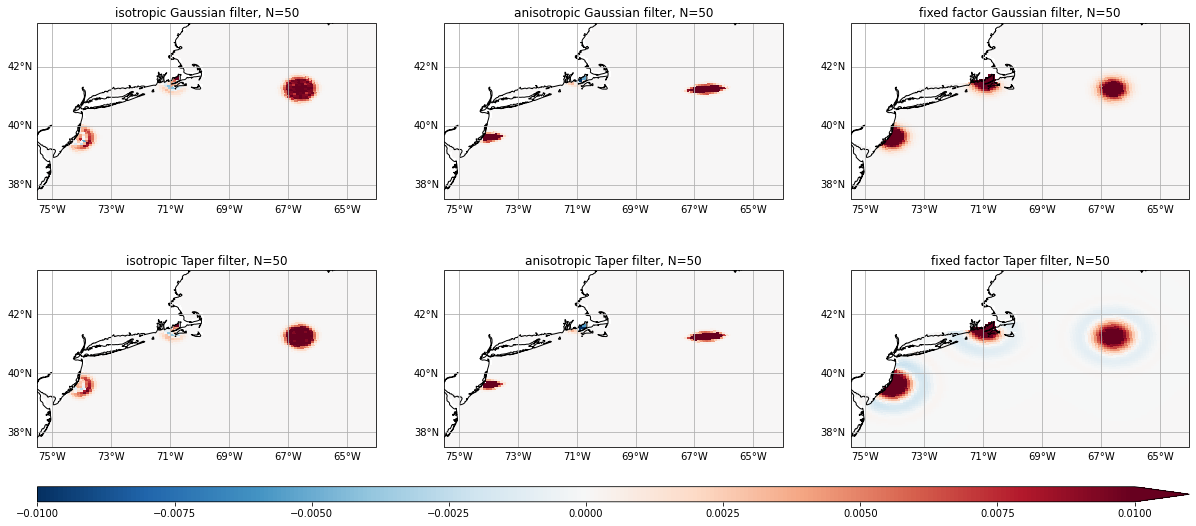

In [38]:
# Gulf Stream region
nlon0_gs = 300
nlon1_gs = 500
nlat0_gs = 1550
nlat1_gs = 1700
xslice = slice(nlon0_gs,nlon1_gs)
yslice = slice(nlat0_gs,nlat1_gs)

fig,axs = plt.subplots(2,3,figsize=(20,7),subplot_kw={'projection':ccrs.PlateCarree()})
        
(delta1_filtered_Gaussian_isotropic+delta2_filtered_Gaussian_isotropic+delta3_filtered_Gaussian_isotropic).isel(nlon=xslice,nlat=yslice).plot(ax=axs[0,0],x='ULONG',y='ULAT',
                                                                     vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                     #norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                     add_colorbar=False,
                                                                     transform=ccrs.PlateCarree())

(delta1_filtered_Gaussian_anisotropic+delta2_filtered_Gaussian_anisotropic+delta3_filtered_Gaussian_anisotropic).isel(nlon=xslice,nlat=yslice).plot(ax=axs[0,1],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                #norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                 add_colorbar=False,
                                                                                 transform=ccrs.PlateCarree())
                                                                               
(delta1_filtered_Taper_isotropic+delta2_filtered_Taper_isotropic+delta3_filtered_Taper_isotropic).isel(nlon=xslice,nlat=yslice).plot(ax=axs[1,0],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                #norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                add_colorbar=False,
                                                                                transform=ccrs.PlateCarree())

(delta1_filtered_Taper_anisotropic+delta2_filtered_Taper_anisotropic+delta3_filtered_Taper_anisotropic).isel(nlon=xslice,nlat=yslice).plot(ax=axs[1,1],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                #norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                add_colorbar=False,
                                                                                transform=ccrs.PlateCarree())

(delta1_filtered_fixed_factor_Gaussian+delta2_filtered_fixed_factor_Gaussian+delta3_filtered_fixed_factor_Gaussian).isel(nlon=xslice,nlat=yslice).plot(ax=axs[0,2],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                #norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                add_colorbar=False,
                                                                                transform=ccrs.PlateCarree())

p=(delta1_filtered_fixed_factor_Taper+delta2_filtered_fixed_factor_Taper+delta3_filtered_fixed_factor_Taper).isel(nlon=xslice,nlat=yslice).plot(ax=axs[1,2],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                #norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                add_colorbar=False,
                                                                                transform=ccrs.PlateCarree())


for ax in axs.flatten():
    ax.coastlines()
    ax.set_extent([-75.5, -64, 37.5, 43.5], crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-75,-73,-71,-69,-67,-65])
    gl.ylocator = mticker.FixedLocator([38,40,42])
    
axs[0,0].set(title='isotropic Gaussian filter, N=50')
axs[0,1].set(title='anisotropic Gaussian filter, N=50')
axs[1,0].set(title='isotropic Taper filter, N=50')
axs[1,1].set(title='anisotropic Taper filter, N=50')
axs[0,2].set(title='fixed factor Gaussian filter, N=50')
axs[1,2].set(title='fixed factor Taper filter, N=50')
# colorbar
fig.subplots_adjust(left=0.1, bottom=-0.02)
cax = fig.add_axes([0.1, -0.1, 0.8, 0.03])
cbar = fig.colorbar(p, cax=cax, orientation='horizontal',extend='max')
    
plt.savefig('figures/effective_kernel.png',dpi=400,bbox_inches='tight',pad_inches=0)

/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  del sys.path[0]
/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:37: Matplotli

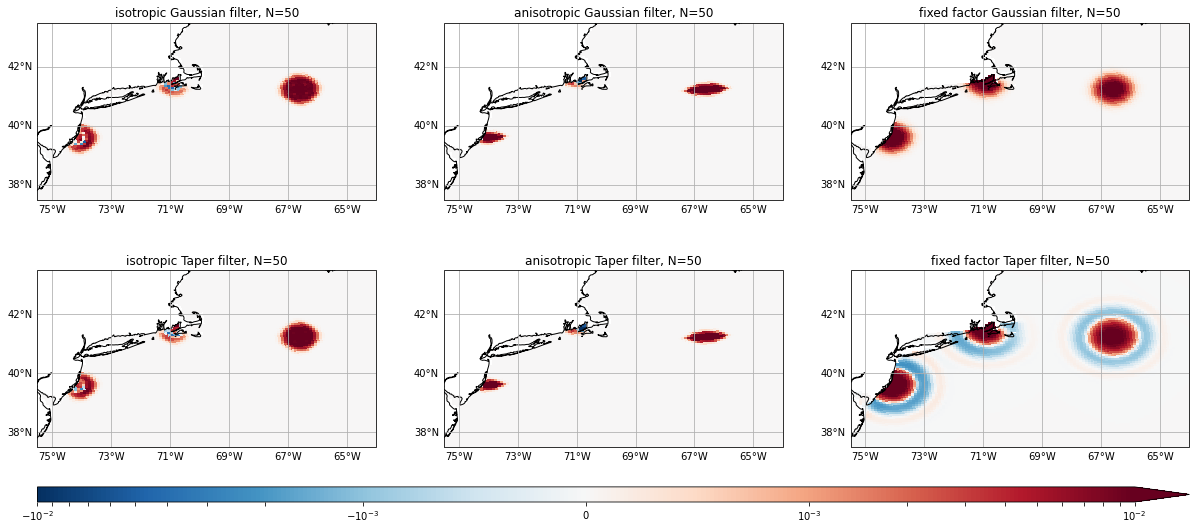

In [39]:
# Gulf Stream region
nlon0_gs = 300
nlon1_gs = 500
nlat0_gs = 1550
nlat1_gs = 1700
xslice = slice(nlon0_gs,nlon1_gs)
yslice = slice(nlat0_gs,nlat1_gs)

fig,axs = plt.subplots(2,3,figsize=(20,7),subplot_kw={'projection':ccrs.PlateCarree()})
        
(delta1_filtered_Gaussian_isotropic+delta2_filtered_Gaussian_isotropic+delta3_filtered_Gaussian_isotropic).isel(nlon=xslice,nlat=yslice).plot(ax=axs[0,0],x='ULONG',y='ULAT',
                                                                     vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                     norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                     add_colorbar=False,
                                                                     transform=ccrs.PlateCarree())

(delta1_filtered_Gaussian_anisotropic+delta2_filtered_Gaussian_anisotropic+delta3_filtered_Gaussian_anisotropic).isel(nlon=xslice,nlat=yslice).plot(ax=axs[0,1],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                 add_colorbar=False,
                                                                                 transform=ccrs.PlateCarree())
                                                                               
(delta1_filtered_Taper_isotropic+delta2_filtered_Taper_isotropic+delta3_filtered_Taper_isotropic).isel(nlon=xslice,nlat=yslice).plot(ax=axs[1,0],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                add_colorbar=False,
                                                                                transform=ccrs.PlateCarree())

(delta1_filtered_Taper_anisotropic+delta2_filtered_Taper_anisotropic+delta3_filtered_Taper_anisotropic).isel(nlon=xslice,nlat=yslice).plot(ax=axs[1,1],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                add_colorbar=False,
                                                                                transform=ccrs.PlateCarree())

(delta1_filtered_fixed_factor_Gaussian+delta2_filtered_fixed_factor_Gaussian+delta3_filtered_fixed_factor_Gaussian).isel(nlon=xslice,nlat=yslice).plot(ax=axs[0,2],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                add_colorbar=False,
                                                                                transform=ccrs.PlateCarree())

p=(delta1_filtered_fixed_factor_Taper+delta2_filtered_fixed_factor_Taper+delta3_filtered_fixed_factor_Taper).isel(nlon=xslice,nlat=yslice).plot(ax=axs[1,2],x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                add_colorbar=False,
                                                                                transform=ccrs.PlateCarree())


for ax in axs.flatten():
    ax.coastlines()
    ax.set_extent([-75.5, -64, 37.5, 43.5], crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-75,-73,-71,-69,-67,-65])
    gl.ylocator = mticker.FixedLocator([38,40,42])
    
axs[0,0].set(title='isotropic Gaussian filter, N=50')
axs[0,1].set(title='anisotropic Gaussian filter, N=50')
axs[1,0].set(title='isotropic Taper filter, N=50')
axs[1,1].set(title='anisotropic Taper filter, N=50')
axs[0,2].set(title='fixed factor Gaussian filter, N=50')
axs[1,2].set(title='fixed factor Taper filter, N=50')
# colorbar
fig.subplots_adjust(left=0.1, bottom=-0.02)
cax = fig.add_axes([0.1, -0.1, 0.8, 0.03])
cbar = fig.colorbar(p, cax=cax, orientation='horizontal',extend='max')
    
plt.savefig('figures/effective_kernel_log.png',dpi=400,bbox_inches='tight',pad_inches=0)

## Large `n_steps`

Note that the effective kernel shape of fixed factor Taper filter becomes very assymetricasl if you choose a large `n_steps`. (Could be again an artifact of numerical instabilities for large `n_steps`?)

In [40]:
filter_fixed_factor_Taper_90steps = gcm_filters.Filter(
    filter_scale=10,
    dx_min=1,
    filter_shape=gcm_filters.FilterShape.TAPER,
    n_steps=90,  
    grid_type=gcm_filters.GridType.CARTESIAN_WITH_LAND,
    grid_vars={'wet_mask': wet_mask}
)
filter_fixed_factor_Taper_90steps

n_steps = 90


Filter(filter_scale=10, dx_min=1, filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=90, grid_type=<GridType.CARTESIAN_WITH_LAND: 2>)

In [41]:
delta1_filtered_fixed_factor_Taper_90steps = filter_fixed_factor_Taper_90steps.apply(delta1*tarea, dims=['nlat', 'nlon'])
delta1_filtered_fixed_factor_Taper_90steps = delta1_filtered_fixed_factor_Taper_90steps/tarea
delta2_filtered_fixed_factor_Taper_90steps = filter_fixed_factor_Taper_90steps.apply(delta2*tarea, dims=['nlat', 'nlon'])
delta2_filtered_fixed_factor_Taper_90steps = delta2_filtered_fixed_factor_Taper_90steps/tarea
delta3_filtered_fixed_factor_Taper_90steps = filter_fixed_factor_Taper_90steps.apply(delta3*tarea, dims=['nlat', 'nlon'])
delta3_filtered_fixed_factor_Taper_90steps = delta3_filtered_fixed_factor_Taper_90steps/tarea

/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """
/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:305: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/noraloose/my_npl_clone/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:341: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


[Text(0.5, 1.0, 'fixed factor Taper filter, N=90')]

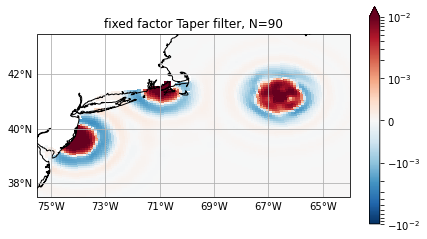

In [42]:
fig,ax = plt.subplots(1,1,figsize=(7,4),subplot_kw={'projection':ccrs.PlateCarree()})

p=(delta1_filtered_fixed_factor_Taper_90steps+delta2_filtered_fixed_factor_Taper_90steps+delta3_filtered_fixed_factor_Taper_90steps).isel(nlon=xslice,nlat=yslice).plot(ax=ax,x='ULONG',y='ULAT',
                                                                                vmin=-0.01,vmax=0.01,cmap='RdBu_r',
                                                                                norm=mpl.colors.SymLogNorm(linthresh=0.001),
                                                                                transform=ccrs.PlateCarree())


ax.coastlines()
ax.set_extent([-75.5, -64, 37.5, 43.5], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-75,-73,-71,-69,-67,-65])
gl.ylocator = mticker.FixedLocator([38,40,42])
    
ax.set(title='fixed factor Taper filter, N=90')